# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file = './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Summarizing the data

n_train = len(X_train)
n_validation = len(X_valid)
n_test = len(X_test)
image_shape = X_train.shape[1:]
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples = ", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples =  4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

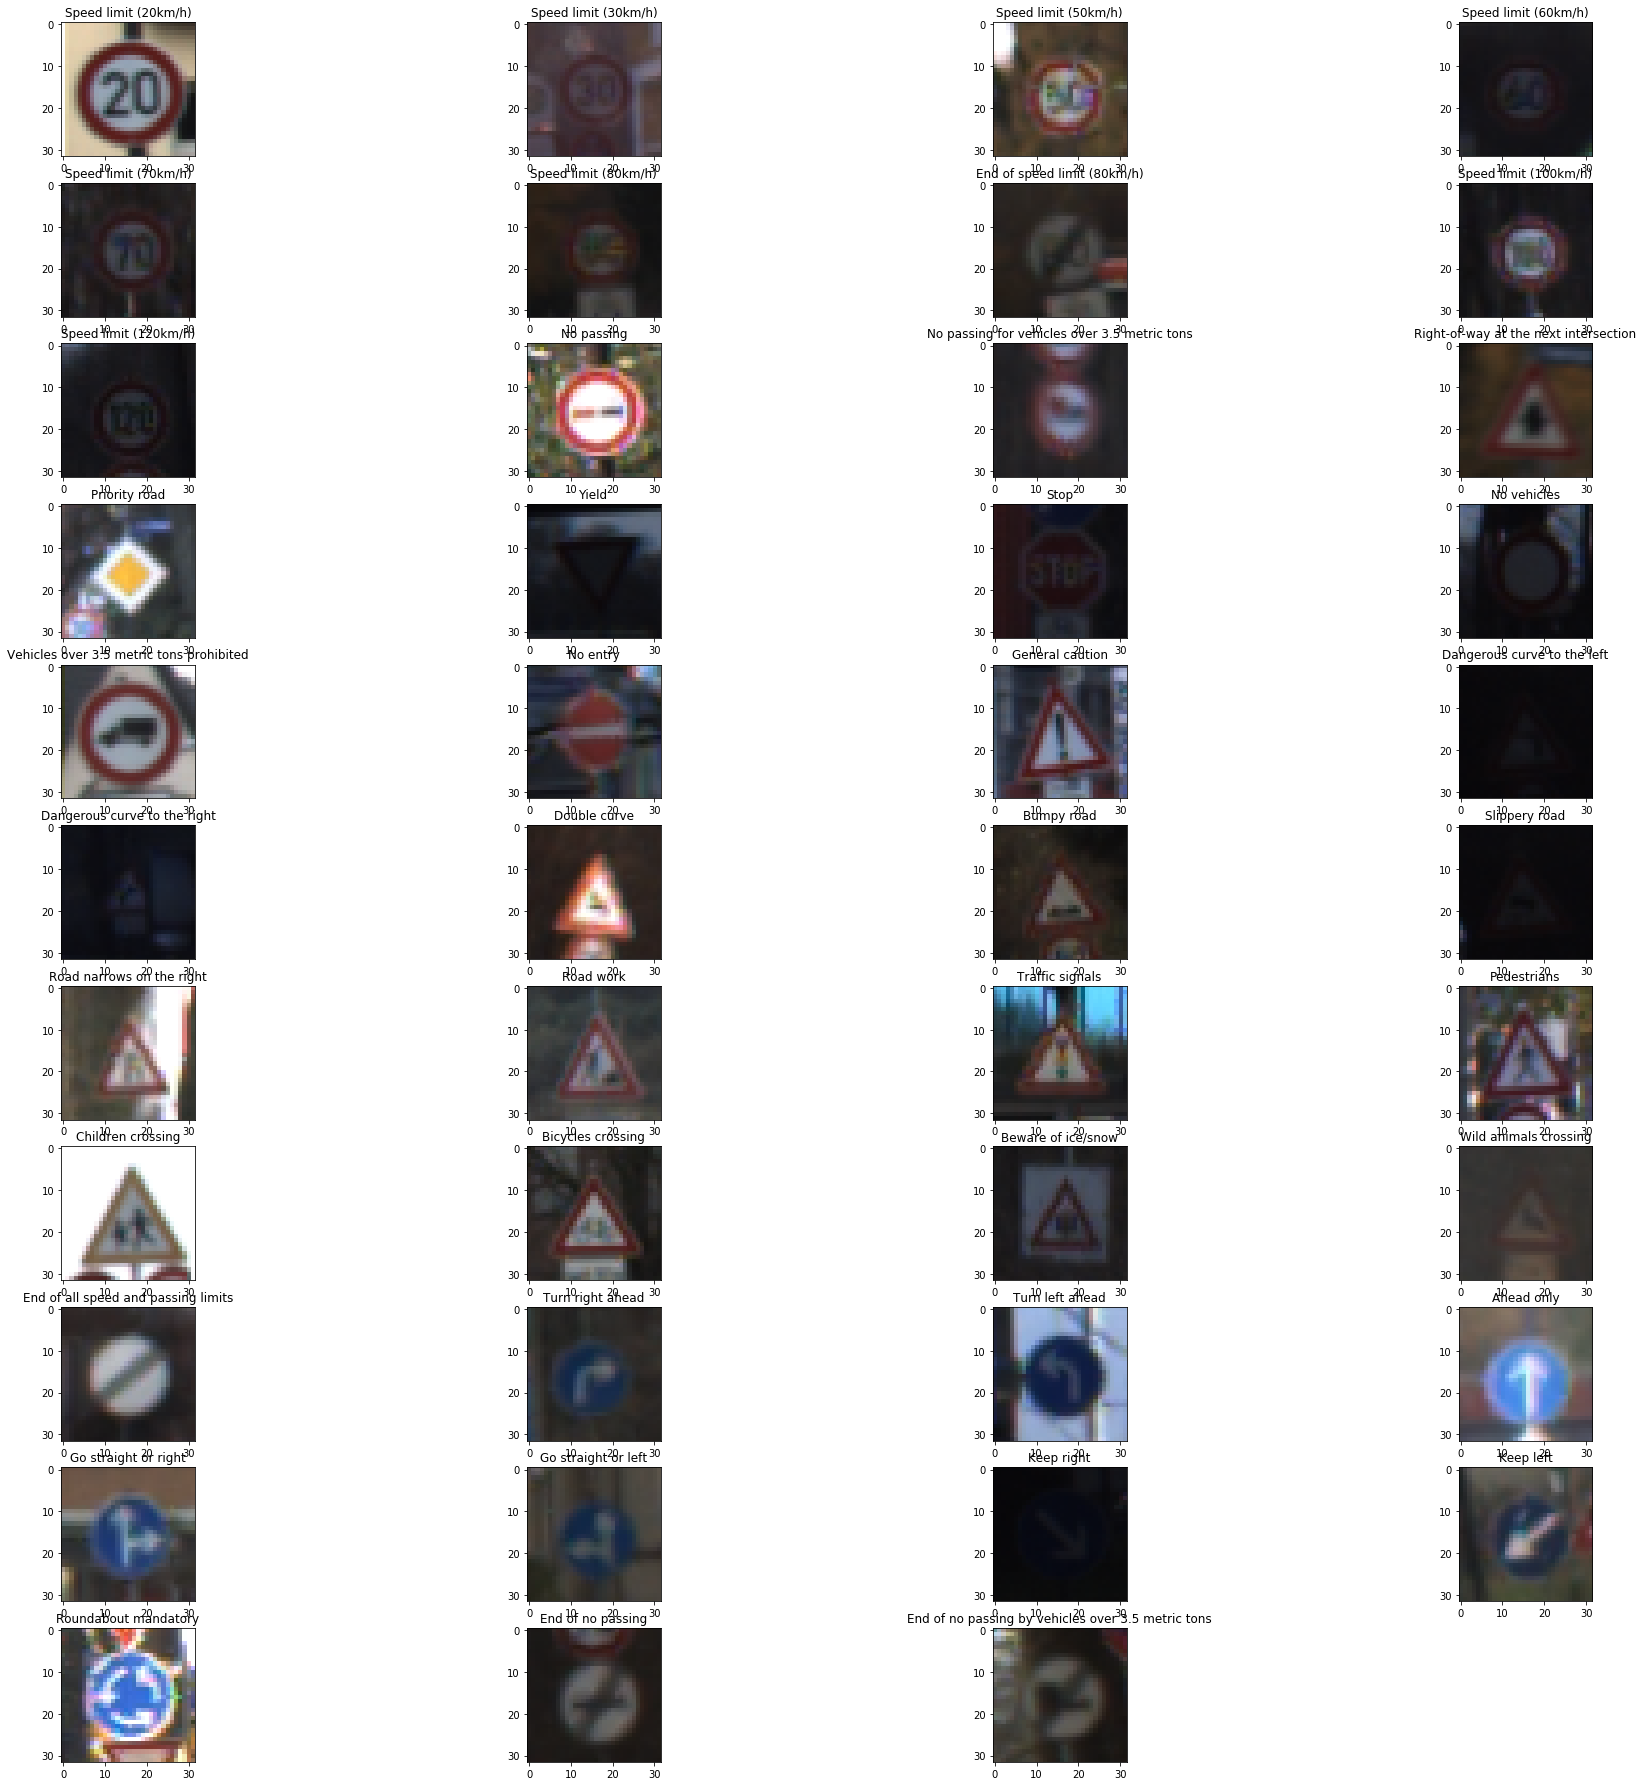

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import csv

labels_lookup_table = None
with open('signnames.csv', mode='r') as f:
    reader = csv.reader(f)
    next(reader, None)
    labels_lookup_table = {int(rows[0]):rows[1] for rows in reader}

### Data exploration visualization

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Visualizing Data for Each Label
fig = plt.figure(figsize=(32,32))
num_columns = 4

for i in range(n_classes):
    k = np.where(y_train==i)
    img = X_train[k[0][0]]
    ax = fig.add_subplot(int(n_classes/num_columns)+1, num_columns, i+1) 
    ax.imshow(img, interpolation='none')
    ax.set_title(labels_lookup_table[y_train[k[0][0]]])
    
plt.show()

In [4]:
### How many of each class do we have?
import csv
import pandas as pd

with open('./signnames.csv', mode='r') as f:
    labels = pd.read_csv(f)
    df = pd.DataFrame()
    df['labels'] = y_train
    
    print(df['labels'].value_counts())

2     2010
1     1980
13    1920
12    1890
38    1860
10    1800
4     1770
5     1650
25    1350
9     1320
7     1290
8     1260
3     1260
11    1170
18    1080
35    1080
17     990
31     690
14     690
33     599
15     540
26     540
28     480
23     450
30     390
34     360
6      360
16     360
22     330
36     330
40     300
20     300
21     270
39     270
24     240
29     240
32     210
42     210
41     210
27     210
37     180
19     180
0      180
Name: labels, dtype: int64


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from sklearn.utils import shuffle
from tqdm import tqdm


### Model Architecture

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 3), name="x_data")
y = tf.placeholder(tf.int32, (None), name="y_data")
keep_prob = tf.placeholder(tf.float32) 
one_hot_y = tf.one_hot(y, n_classes)

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma), name="layer_one_weights")
    conv1_b = tf.Variable(tf.zeros(6), name="layer_one_bias")
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma),  name='layer_2_weights')
    conv2_b = tf.Variable(tf.zeros(16), name='layer_2_bias')
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = tf.contrib.layers.flatten(conv2)

    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma), name='layer_3_weights')
    fc1_b = tf.Variable(tf.zeros(120), name='layer_3_bias')
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma), name='layer_4_weights')
    fc2_b  = tf.Variable(tf.zeros(84), name='layer_4_bias')
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 43 (n_classes).
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma), name='layer_5_weights')
    fc3_b  = tf.Variable(tf.zeros(43), name='layer_5_weights')
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [7]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


# Defining learning parameters
learning_rate = 0.001
training_epochs = 50
batch_size = 2048 

# Training pipeline
normalized = tf.map_fn(lambda img: tf.image.per_image_standardization(img), x)
logits = LeNet(normalized)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

correct_predictions = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
saver = tf.train.Saver()


def evaluate(predictions, labels):
    num_examples = len(predictions)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = predictions[offset:offset+batch_size], labels[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


def train():
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        #print("Training...")
        X_train, y_train = shuffle(X_train, y_train, random_state=0)

        for i in tqdm(range(training_epochs), unit='Epoch'):
            for offset in tqdm(range(0, n_train, batch_size)):
                batch_x, batch_y = X_train[offset:offset+batch_size], y_train[offset:offset+batch_size]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})


        training_accuracy = evaluate(X_train, y_train)
        print("Training accuracy is {:.3f}".format(training_accuracy))
        validation_accuracy = evaluate(X_valid, y_valid)
        print("Validation Accurracy is {:.3f}".format(validation_accuracy))
        print()
        saver.save(sess, './model/lenet')


    

In [13]:
### Test with the test data
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./model'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accurracy is {:.3f}".format(test_accuracy))

        


Test Accurracy is 0.934



### Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

### Predict the Sign Type for Each Image

In [9]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

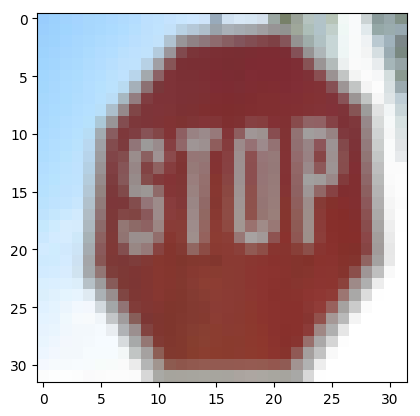

Neural Net is %0.999872 sure Image is Stop


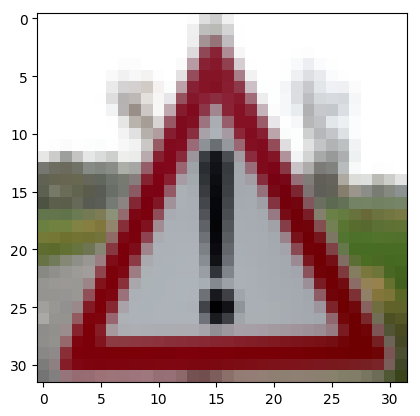

Neural Net is %0.999922 sure Image is General caution


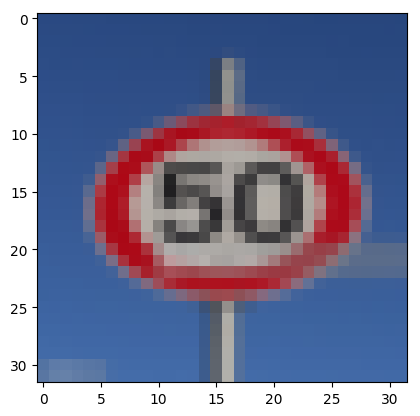

Neural Net is %0.861622 sure Image is Speed limit (50km/h)


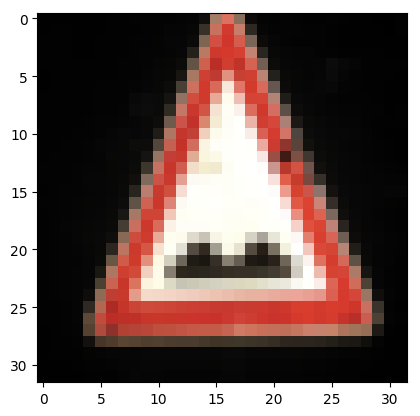

Neural Net is %0.967716 sure Image is Bumpy road


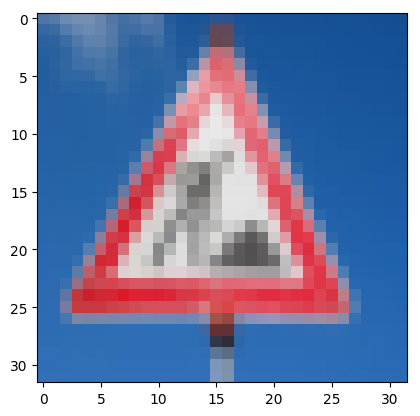

Neural Net is %0.940333 sure Image is Road work


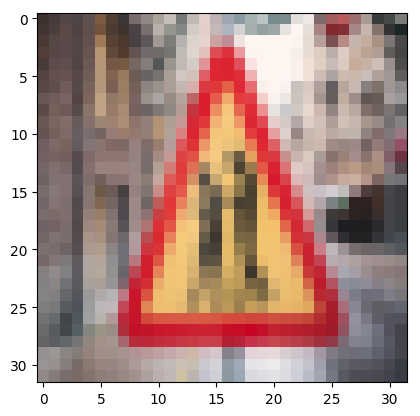

Neural Net is %0.437202 sure Image is Pedestrians


In [10]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from glob import glob 
from scipy import misc

filenames = glob('./additional_images/*.jpg')
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./model'))
    plt.rcdefaults()
    
    for img_name in filenames:
        image = misc.imread(img_name)
        image = misc.imresize(image, [32,32])
        plt.imshow(image, interpolation='none')
        plt.show()

        probabilities = sess.run(tf.nn.softmax(logits), feed_dict={x: [image], keep_prob: 1.0})
        top_5 = sess.run(tf.nn.top_k(probabilities, 5))
        print("Neural Net is %{:3f} sure Image is {}".format(top_5[0][0][0], labels_lookup_table[top_5[1][0][0]]))



### Output Top 5 Softmax Probabilities For Each Image Found on the Web

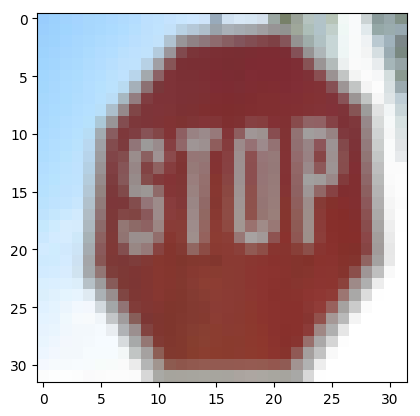

Top 5 Probable classes are:
Stop, with probability of 99.987%
Yield, with probability of 0.007%
No entry, with probability of 0.002%
Speed limit (80km/h), with probability of 0.001%
Road work, with probability of 0.001%


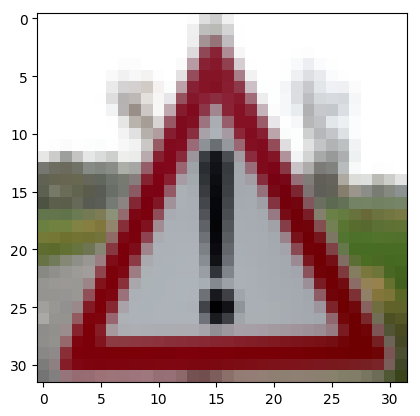

Top 5 Probable classes are:
General caution, with probability of 99.992%
Traffic signals, with probability of 0.006%
Pedestrians, with probability of 0.001%
Road narrows on the right, with probability of 0.000%
Bumpy road, with probability of 0.000%


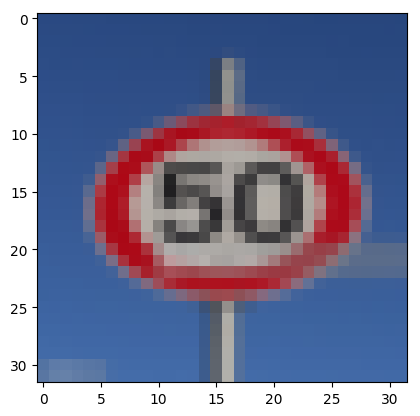

Top 5 Probable classes are:
Speed limit (50km/h), with probability of 86.162%
Speed limit (30km/h), with probability of 13.744%
Speed limit (80km/h), with probability of 0.091%
Speed limit (100km/h), with probability of 0.003%
End of speed limit (80km/h), with probability of 0.000%


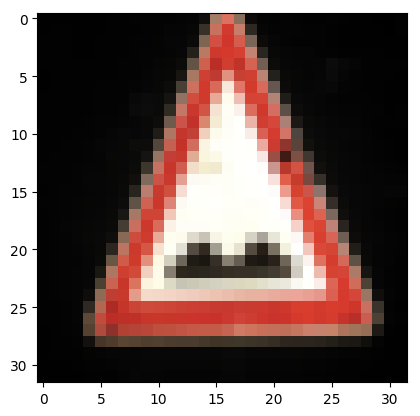

Top 5 Probable classes are:
Bumpy road, with probability of 96.772%
Bicycles crossing, with probability of 2.320%
Road work, with probability of 0.515%
Wild animals crossing, with probability of 0.115%
Children crossing, with probability of 0.094%


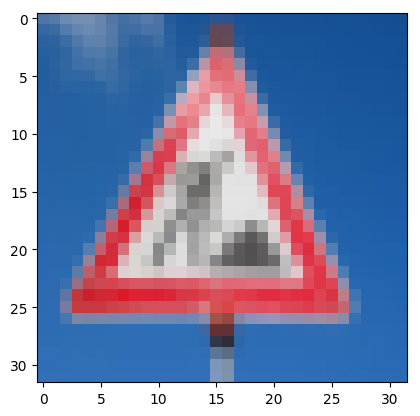

Top 5 Probable classes are:
Road work, with probability of 94.033%
Bicycles crossing, with probability of 2.939%
Wild animals crossing, with probability of 2.224%
Bumpy road, with probability of 0.488%
Beware of ice/snow, with probability of 0.149%


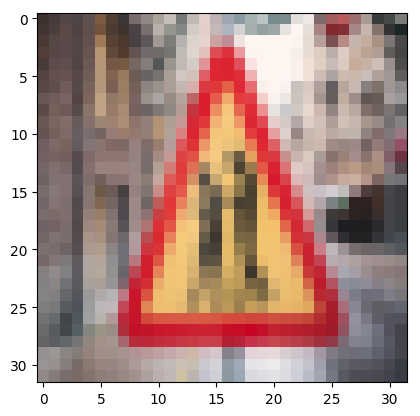

Top 5 Probable classes are:
Pedestrians, with probability of 43.720%
General caution, with probability of 26.552%
Road narrows on the right, with probability of 14.235%
Right-of-way at the next intersection, with probability of 11.750%
Bicycles crossing, with probability of 2.500%


In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from glob import glob 
from scipy import misc

filenames = glob('./additional_images/*.jpg')
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./model'))
    plt.rcdefaults()
    
    for img_name in filenames:
        image = misc.imread(img_name)
        image = misc.imresize(image, [32,32])
        plt.imshow(image, interpolation='none')
        plt.show()

        probabilities = sess.run(tf.nn.softmax(logits), feed_dict={x: [image], keep_prob: 1.0})
        top_5 = sess.run(tf.nn.top_k(probabilities, 5))
        # print("Neural Net is %{:3f} sure Image is {}".format(values[0][0], labels_lookup_table[indicies[0][0]]))
        print("Top 5 Probable classes are:")
        
        for i in range(5):
            print("{}, with probability of {:.3%}".format(labels_lookup_table[top_5[1][0][i]], top_5[0][0][i]))


### Analyze Performance

In [12]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.